In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../../scripts')) # if notebook in folder

import preprocessing_time_series as pts

os.chdir(pts.working_dir() + 'Feature_releases/release_v02/')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train_Queretaro de Arteaga.csv')
df.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Dev_uni_proxima,Log_Demanda,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK,...,No_remains_Mean_Producto_ID_Ruta_SAK_4last,No_remains_Mean_brand_Cliente_ID_Agencia_ID_4last,Ordered_4last,Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,Ordered_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Ordered_Mean_Producto_ID_Ruta_SAK_4last,Ordered_Mean_brand_Cliente_ID_Agencia_ID_4last,Venta_hoy_4last,Venta_hoy_by_uni_4last,Venta_uni_hoy_4last
0,1210,5,653039,395.0,0.00,NaN,0.0,5.981414,5.712620,6.255725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,7.0,6.356108,6.137538,6.605798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,0.0,5.411646,3.830277,5.193466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,0.0,3.713572,4.586806,4.949039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,0.0,5.209486,5.206432,5.203316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


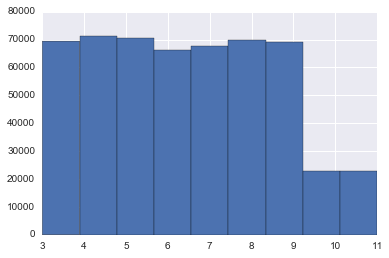

In [3]:
df.Semana.hist(bins=9)

Как-то раньше не обращал внимания на то, что в 10-11 неделях настолько меньше наблюдений

Demanda_uni_equil_4last,False,True
Demanda_uni_equil_1,,
False,305828,0
True,48616,175388


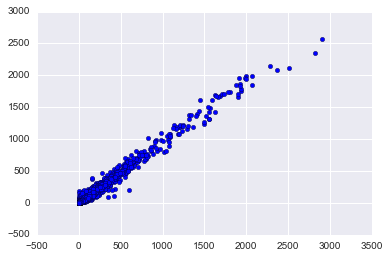

In [7]:
plt.scatter(df.Demanda_uni_equil_1, df.Demanda_uni_equil_4last)
pd.crosstab(df.Demanda_uni_equil_1.isnull(), df.Demanda_uni_equil_4last.isnull())

то есть примерно то же самое, но меньше пропущенных значений (на 48 тыс записей всего :confused:)

In [5]:
(~df.isnull()).sum().sort_values()

Dev_proxima_by_uni_4                                            3078
Dev_proxima_by_uni_3                                            3935
Dev_proxima_by_uni_1                                            4913
Dev_proxima_by_uni_2                                            4995
Dev_proxima_by_uni_2last                                        8793
Dev_proxima_by_uni_3last                                       11431
Dev_proxima_by_uni_4last                                       13327
Dev_proxima_by_uni                                             15359
Venta_hoy_by_uni_4                                            128492
Venta_uni_hoy_4                                               128588
Dev_proxima_4                                                 128588
Log_Demanda_4                                                 128588
Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_4          128588
Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4            128588
Log_Demanda_Mean_Producto_ID_Ruta_